# Анализ бизнес-показателей и окупаемости рекламы  приложения ProcrastinatePRO+

# Описание проекта

В данном исследовании проводится маркетинговый анализ причин убыток развлекательного приложения Procrastinate Pro+. Несколько месяцев в привлечение пользователей были вложены деньги, но они не принесли результата. Компания показывает реузльтаты ниже уровня доходности.

В распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. В рамках исследования будет изучено, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей

# Описание данных

В распоряжении три датасета:
 -  visits_info_short.csv —  хранит лог сервера с информацией о посещениях сайта, 
 - orders_info_short.csv — информацию о заказах
 - costs_info_short.csv — информацию о расходах на рекламу.

Структура **visits_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура **orders_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура **costs_info_short.csv:**
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

# План работ
***Шаг 1. Загрузка данных и подготовка к анализу***
- Загрузка данных
- Изучите данных и предобработка

***Шаг 2. Вывод необходимых функций для расчёта и анализа LTV, ROI, удержания и конверсии.***

***Шаг 3. Исследовательский анализ данных***
- Составление профилей пользователей. 
- Определение минимальную и максимальную даты привлечения пользователей.
- Исследование, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
- Постройка таблицы, отражающую количество пользователей и долю платящих из каждой страны.
- Исследование , какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
- Постройка таблицы, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. 
- Постройка таблицы, отражающую количество пользователей и долю платящих для каждого канала привлечения.

***Шаг 4. Маркетинг***
- Посчёт общую сумму расходов на маркетинг.
- Исследование, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройка визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Исследование, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 
- Промежуточный вывод

***Шаг 5. Оценка окупаемости рекламы***
- Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.
- Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверка конверсию пользователей и динамику её изменения. Проверка удержания пользователей. 
 - Постройка и изучение графиков конверсии и удержания.
- Анализ окупаемость рекламы с разбивкой по устройствам. Постройка графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Анализ окупаемости рекламы с разбивкой по странам. Постройка графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Анализ окупаемости рекламы с разбивкой по рекламным каналам. Постройка графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Ответ на такие вопросы:
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?
- Вывод, описание возможных причин обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

***Шаг 6. Общий вывод***
- Выделение причин неэффективности привлечения пользователей.
- Формулировка рекомендаций для отдела маркетинга.

### Загрузка данных и подготовка их к анализу

#### Загрузка данных и вывод общей информации

In [2]:
# загрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from datetime import datetime, timedelta
import numpy as np

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-

In [ ]:
# загрузка данных
sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')
# вывод обзор данных и вывод общей информации
print(sessions.head(5))
print(orders.head(5))
print(ad_costs.head(5))

print(sessions.info())
print(orders.info())
print(ad_costs.info())

#### Обработка название столбцов

In [3]:
# приведение названий к нижнему регистру
sessions.columns = sessions.columns.str.lower()
orders.columns = orders.columns.str.lower()
ad_costs.columns = ad_costs.columns.str.lower()

# приведение названий к нормальному стилю
sessions = sessions.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
orders = orders.rename(columns = {'user id':'user_id', 'event dt':'event_dt'})

# обзор измененых столбцов
print(sessions.columns)
print(orders.columns)
print(ad_costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [4]:
print(sessions.head(5))
print(orders.head(5))
print(ad_costs.head(5))

        user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
        user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
           dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-

#### Обработка типов данных столбцов

In [5]:
# Изменение типов данных
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date
# Проверка результа
print(sessions['session_start'].dtypes,
sessions['session_end'].dtypes,
orders['event_dt'].dtypes,
ad_costs['dt'].dtypes)


datetime64[ns] datetime64[ns] datetime64[ns] object


#### Подсчет пропусков и дубликатов

In [6]:
# подсчёт пропусков
print(sessions.isnull().sum())  
print(orders.isnull().sum())  
print(ad_costs.isnull().sum())
# подсчёт дубликатов
print(sessions.duplicated().sum())  
print(orders.duplicated().sum())  
print(ad_costs.duplicated().sum())


user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
user_id     0
event_dt    0
revenue     0
dtype: int64
dt         0
channel    0
costs      0
dtype: int64
0
0
0


### Вывод необходимых функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик

##### Функция для создания профилей пользователей

In [7]:
# функция для создания пользовательских профилей


def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

profiles = get_profiles(sessions, orders, ad_costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Исключение органических пользователей перед работой с функциями

In [8]:
profiles_not_org = profiles.query('channel != "organic"')

##### Функция для подсчёта Retention Rate

In [9]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

retention_raw, retention_grouped, retention_history = get_retention(profiles_not_org,
                                                             sessions,
                                                             datetime(2019, 11, 1).date(),
                                                             14)
display(retention_raw.head(),retention_grouped.head(), retention_history.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,session_start,lifetime
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:58:57,0
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:00:42,0
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:33:16,1
3,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,2019-07-09 12:46:07,0
4,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,2019-07-10 22:27:24,1


,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.011173  0.002793  0.013966  
      2019-05-02  0.010000  0.016667  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  
      2019-05-05  0.009709  0.012136  0.002427

##### Функция для подсчёта конверсии

In [10]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_not_org,
    orders,
    datetime(2019, 11, 1).date(),
    14)
display(conversion_raw.head(), conversion.head(), conversion_history.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,0.0,All users
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,NaT,NaN,All users
2,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,NaT,NaN,All users
3,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,NaT,NaN,All users
4,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000,2019-06-30 03:46:52,0.0,All users


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.058974,0.066667,0.071795,0.071795,0.076923,0.076923,0.076923,0.079487,0.082051,0.082051,0.082051,0.082051,0.082051,0.082051
2019-05-02,323,0.058824,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.071207,0.071207,0.071207,0.071207
2019-05-03,346,0.057803,0.069364,0.075145,0.078035,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.086705
2019-05-04,457,0.070022,0.074398,0.076586,0.078775,0.085339,0.085339,0.087527,0.089716,0.089716,0.091904,0.091904,0.091904,0.091904,0.091904
2019-05-05,438,0.036530,0.043379,0.047945,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511


##### Функция для подсчёта LTV

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )
ltv_raw, ltv_grouped, ltv_history, roi, roi_history = get_ltv(
    profiles_not_org, orders,  datetime(2019, 11, 1).date(),
    14)
display(ltv_raw.head(),
      ltv_grouped.head(),
      ltv_history.head(),
      roi.head(),
      roi_history.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,event_dt,revenue,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,4.99,0.0,All users
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:01:28,4.99,0.0,All users
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:34:01,4.99,1.0,All users
3,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,NaT,NaN,NaN,All users
4,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,NaT,NaN,NaN,All users


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.294282,0.383846,0.435026,0.514359,0.565538,0.565538,0.578333,0.603923,0.680692,0.757538,0.808718,0.872692,0.885487,0.898282
2019-05-02,323,0.324427,0.618235,0.664582,0.757276,0.803622,0.880898,0.911796,0.942693,1.004489,1.035387,1.081734,1.081734,1.112632,1.158978
2019-05-03,346,0.305751,0.452861,0.568237,0.669191,0.943468,0.986734,1.001156,1.001156,1.073266,1.116532,1.130954,1.203064,1.260751,1.304017
2019-05-04,457,0.471904,0.570175,0.624770,0.679365,0.876105,0.952538,0.974376,1.028972,1.061729,1.094486,1.127243,1.181838,1.181838,1.214595
2019-05-05,438,0.232443,0.394429,0.417215,0.462785,0.496963,0.519749,0.553927,0.588105,0.599498,0.622283,0.667854,0.679247,0.713425,0.713425


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,,
2019-05-01,390,0.781590,0.376517,0.491110,0.556591,0.658093,0.723575,0.723575,0.739945,0.772686,0.870907,0.969228,1.034709,1.116561,1.132931,1.149301
2019-05-02,323,0.714690,0.453941,0.865039,0.929888,1.059585,1.124434,1.232559,1.275791,1.319024,1.405489,1.448721,1.513570,1.513570,1.556802,1.621651
2019-05-03,346,0.760318,0.402136,0.595621,0.747368,0.880146,1.240886,1.297791,1.316760,1.316760,1.411601,1.468506,1.487475,1.582316,1.658190,1.715095
2019-05-04,457,0.737418,0.639941,0.773205,0.847240,0.921276,1.188071,1.291721,1.321335,1.395371,1.439792,1.484214,1.528635,1.602671,1.602671,1.647092
2019-05-05,438,0.730377,0.318251,0.540035,0.571232,0.633626,0.680421,0.711618,0.758413,0.805208,0.820806,0.852003,0.914396,0.929995,0.976790,0.976790


#### Функции для построения графиков

##### Функция для сглаживания данных

In [12]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### Функция для построения графика Retention Rate

In [13]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Функция для построения графика конверсии

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### Функция для визуализации LTV и ROI

In [36]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
 
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))
 
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
 
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
 
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
 
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
 
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
 
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
 
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
 
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
 
    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройтка таблицы, отражающую количество пользователей и долю платящих из каждой страны.
- Изучение, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Постройка таблицы, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта выводы.

#### Профили пользователей. Минимальная и максимальная даты привлечения пользователей

In [16]:
profiles_min = profiles['dt'].min()
profiles_max = profiles['dt'].max()
print(profiles_min, profiles_max)

2019-05-01 2019-10-27


#### Страны-лидеры по привлечению платящих пользователей и их доля в общем количестве

In [17]:
pay_profiles_country=profiles.query('payer==True').groupby('region')['user_id'].nunique().reset_index()
profiles_country=profiles.groupby('region')['user_id'].nunique().reset_index()
pay_profiles_country['share_paying'] = pay_profiles_country['user_id'] / profiles_country['user_id']
profiles_country = profiles_country.rename(columns={'user_id':'users'})
profiles_country['payers'] = pay_profiles_country['user_id']
profiles_country['payers_share'] = pay_profiles_country['share_paying']
profiles_country = profiles_country.sort_values(by = ['payers'], ascending = False)
profiles_country.style.format({'payers_share': '{:.2%}'})

,region,users,payers,payers_share
3,United States,100002,6902,6.90%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%
1,Germany,14981,616,4.11%


Вывод: На США приходится самое большое количество платящих клиентов и у этой страны так же самая высокая доля платящих клиентов

#### Популярные устройства у  платящих пользователей,  и  доля платящих в общем количестве на устройствах

In [18]:
pay_profiles_device=profiles.query('payer==True').groupby('device')['user_id'].nunique().reset_index()
profiles_device=profiles.groupby('device')['user_id'].nunique().reset_index()
pay_profiles_device['share_paying'] = pay_profiles_device['user_id'] / profiles_device['user_id']
profiles_device = profiles_device.rename(columns={'user_id':'users'})
profiles_device['payers'] = pay_profiles_device['user_id']
profiles_device['payers_share'] = pay_profiles_device['share_paying']
profiles_device = profiles_device.sort_values(by = ['payers'], ascending = False)
profiles_device.style.format({'payers_share': '{:.2%}'})

,device,users,payers,payers_share
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
1,Mac,30042,1912,6.36%
2,PC,30455,1537,5.05%


Вывод: Наибольшую популярность у платящих клиентов пользуется Iphone-устройства 
При этом доля платящих на этих устройствах хоть и достаточно высокая все же лидером по доле выступают Mac-устройства

#### Наиболее популярные каналы привлечения пользователей и доля привлечённых платящих пользователей

In [19]:
pay_profiles_channel=profiles.query('payer==True').groupby('channel')['user_id'].nunique().reset_index()
profiles_channel=profiles.groupby('channel')['user_id'].nunique().reset_index()
pay_profiles_channel['share_paying'] = pay_profiles_channel['user_id'] / profiles_channel['user_id']
profiles_channel = profiles_channel.rename(columns={'user_id':'users'})
profiles_channel['payers'] = pay_profiles_channel['user_id']
profiles_channel['payers_share'] = pay_profiles_channel['share_paying']
profiles_channel = profiles_channel.sort_values(by = ['payers'], ascending = False)
profiles_channel.style.format({'payers_share': '{:.2%}'})

,channel,users,payers,payers_share
1,FaceBoom,29144,3557,12.20%
6,TipTop,19561,1878,9.60%
10,organic,56439,1160,2.06%
7,WahooNetBanner,8553,453,5.30%
0,AdNonSense,3880,440,11.34%
5,RocketSuperAds,4448,352,7.91%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%
9,lambdaMediaAds,2149,225,10.47%
8,YRabbit,4312,165,3.83%


Вывод: На FaceBoom приходится самое большое количество привлечённых платящих клиентов и у этого канала так же самая высокая доля платящих клиентов

### Маркетинг

- Посчет общей сумму расходов на маркетинг.
- Анализ, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройка визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику на одном графике.
- Анализ, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Промежуточные выводы.

#### Общие затраты на привлечение

In [20]:
marketing_costs = profiles['acquisition_cost'].sum().round(1)
print(marketing_costs)

105497.3


#### Распределение затрат по рекламным источникам

In [21]:
cost_channel=profiles.groupby('channel')['acquisition_cost'].sum().reset_index()
print(cost_channel.sort_values(by = ['acquisition_cost'], ascending = False))

               channel  acquisition_cost
6               TipTop          54751.30
1             FaceBoom          32445.60
7       WahooNetBanner           5151.00
0           AdNonSense           3911.25
4   OppleCreativeMedia           2151.25
5       RocketSuperAds           1833.00
2              LeapBob           1797.60
9       lambdaMediaAds           1557.60
3         MediaTornado            954.48
8              YRabbit            944.22
10             organic              0.00


Как видно из таблицы наибольшие затраты пришлись на канал TipTop, а так же с большим отрывом от остальных на канал FaceBoom

#### Постройка визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

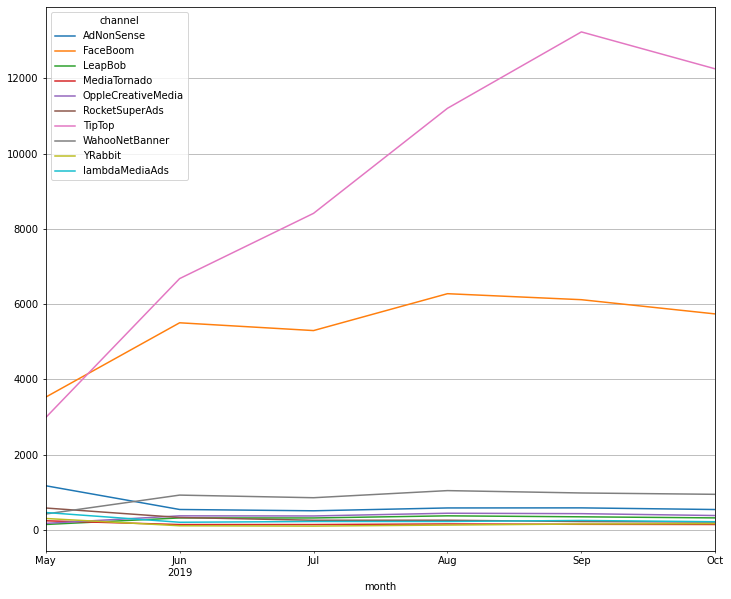

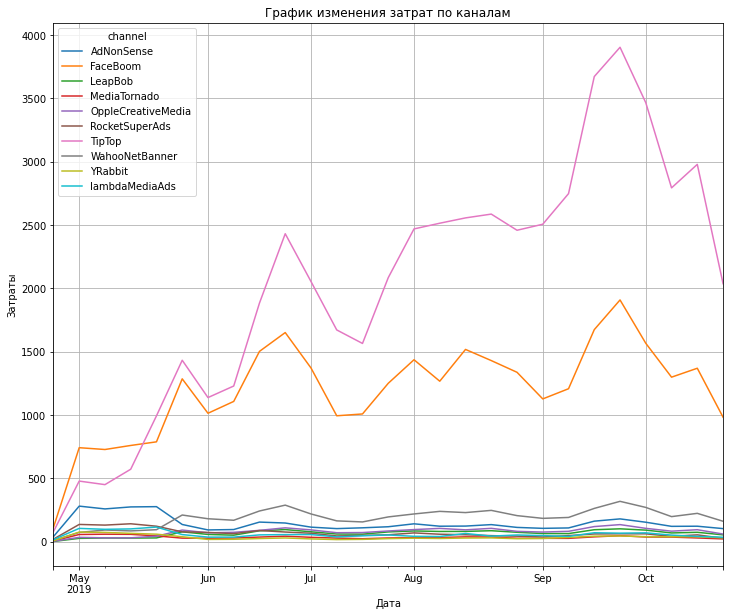

In [22]:
ad_costs['week']= ad_costs['dt'].astype('datetime64[W]')
ad_costs['month']= ad_costs['dt'].astype('datetime64[M]')
month_data = ad_costs.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='sum'
    )
week_data = ad_costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    )
month_data.plot(
           figsize=(12, 10),
           grid=True,)
week_data.plot(
           figsize=(12, 10),
           grid=True,)
plt.title('График изменения затрат по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Как видно из графиков затраты на привлечение особенно сильно росли (учитывая недельный график рост не был стабильным) у каналов FaceBoom и Tiptop, (что говорит что маркетинговый отдел сделал упор именно на эти каналы) с начала осени рост остановился

#### Cредняя стоимость привлечения одного пользователя (CAC)

Вывод: Как видно из таблицы, с большим отрывом, наиболее 'дорогие' клиенты пришли от канала Tiptop

In [23]:
profiles_cac = profiles.groupby('channel')['acquisition_cost'].mean().reset_index()
profiles_channel['mean_CAC'] = profiles_cac['acquisition_cost']
profiles_channel.style.format({'payers_share': '{:.2%}', 'mean_CAC':'{:.2f}'})

,channel,users,payers,payers_share,mean_CAC
1,FaceBoom,29144,3557,12.20%,1.11
6,TipTop,19561,1878,9.60%,2.80
10,organic,56439,1160,2.06%,0.00
7,WahooNetBanner,8553,453,5.30%,0.60
0,AdNonSense,3880,440,11.34%,1.01
5,RocketSuperAds,4448,352,7.91%,0.41
2,LeapBob,8553,262,3.06%,0.21
4,OppleCreativeMedia,8605,233,2.71%,0.25
9,lambdaMediaAds,2149,225,10.47%,0.72
8,YRabbit,4312,165,3.83%,0.22


### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, анализ окупаемости рекламы. Допустим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей нужно определить самостоятельно.

- Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Проверка конверсии пользователей и динамику её изменения. То же самое нужно сделать с удержанием пользователей. Постройка и изучение графиков конверсии и удержания.
- Анализ окупаемости рекламы с разбивкой по устройствам. Постройка графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Анализ окупаемости рекламы с разбивкой по странам. Постройка графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Анализ окупаемости рекламы с разбивкой по рекламным каналам. Постройка графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Ответ вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Вывод, описать возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

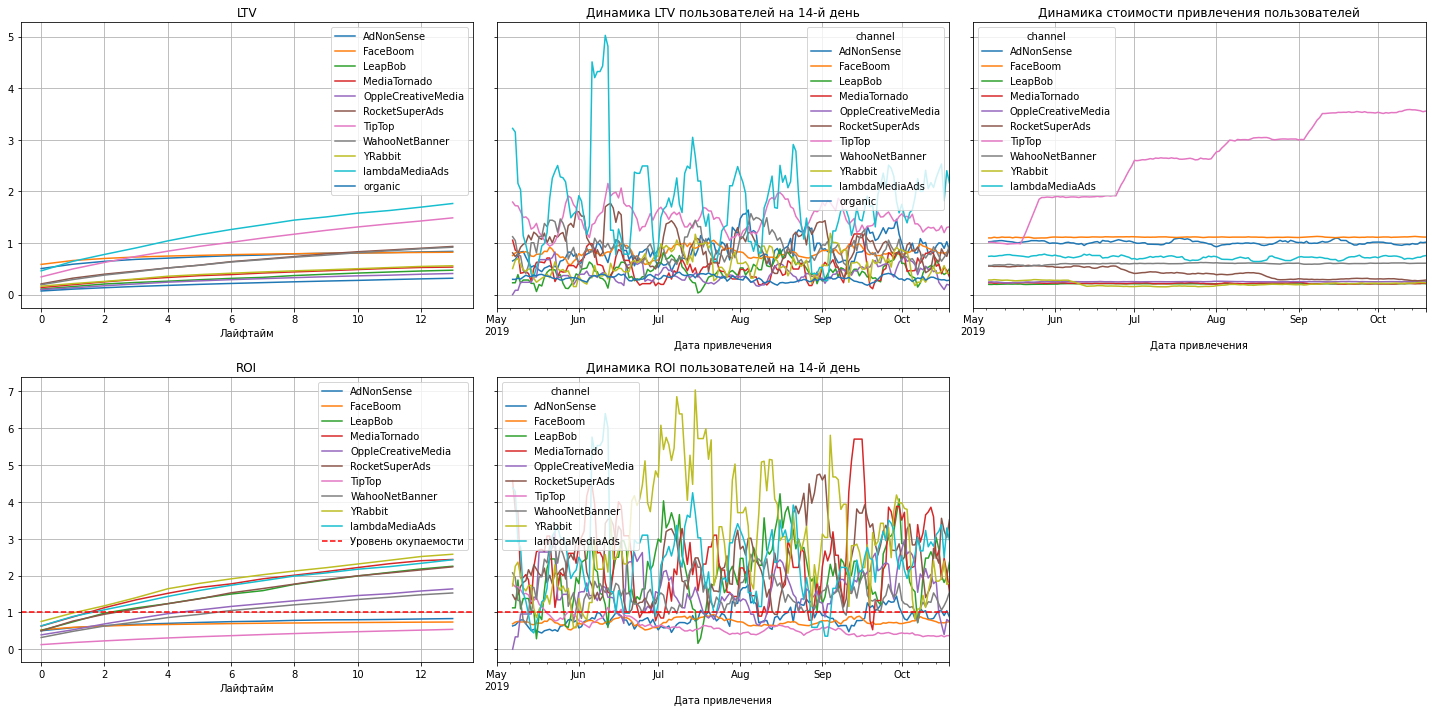

In [37]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Вывод как видно из графиков хоть и ltv растет,  инвестиции не окупаются, даже на 14 день, при этом динамика ltv остается стабильной, стоимость инвестиций растет стоимость инвестиций с конца апреля значительно выросла

#### Проверка конверсии пользователей и динамику её изменения.

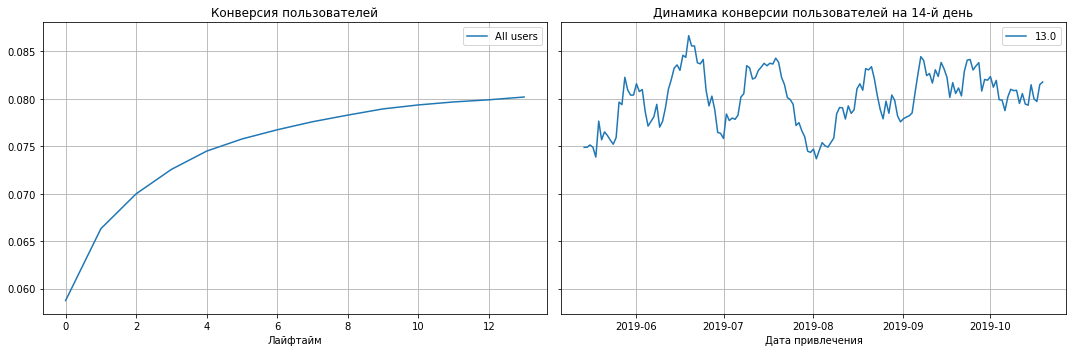

In [25]:
plot_conversion(conversion, conversion_history, 14, window=14)

Выводы: Конверсия с учетом лайфтайма показывает рост, учитывая сезонность динамика стабильная

Конверсия пользователей в целом растет и остается стабильной

#### Проверка удержания пользователей и динамику её изменения.

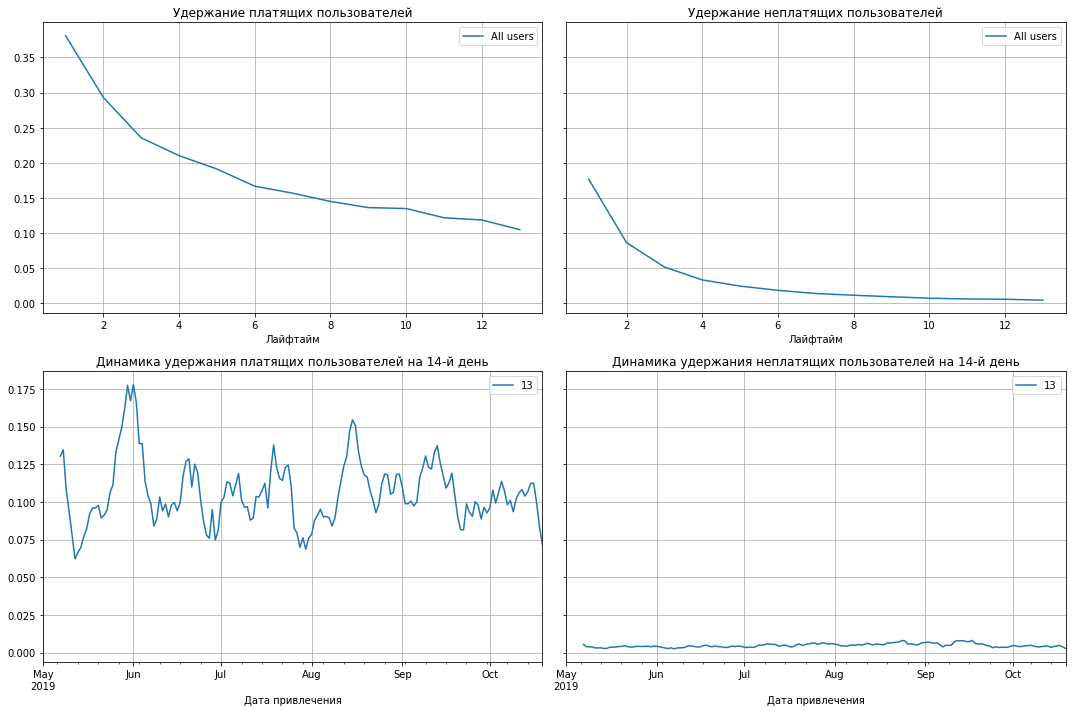

In [26]:
plot_retention(retention_grouped, retention_history, 14, window=7)

Удержание всех пользователей сильно падает на графике лайфтайма

#### Анализ окупаемости рекламы с разбивкой по устройствам. Постройка графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

##### Анализ конверсии пользователей 

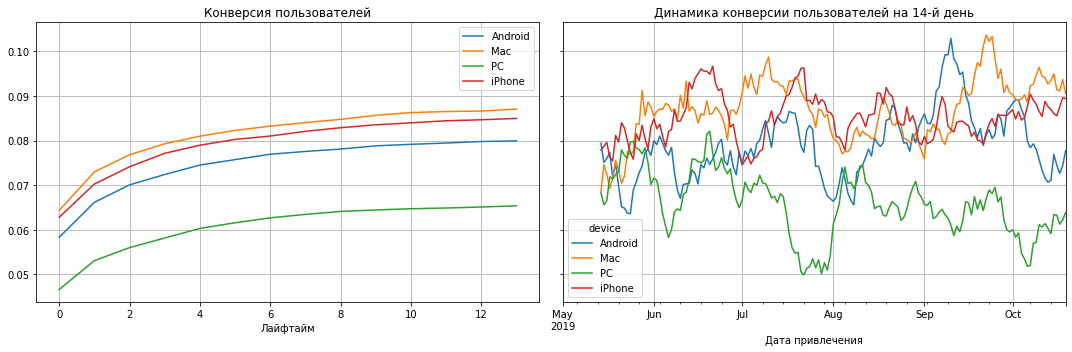

In [27]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_not_org,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device'])
plot_conversion(conversion, conversion_history, 14, window=14)

##### Анализ удержания пользователей

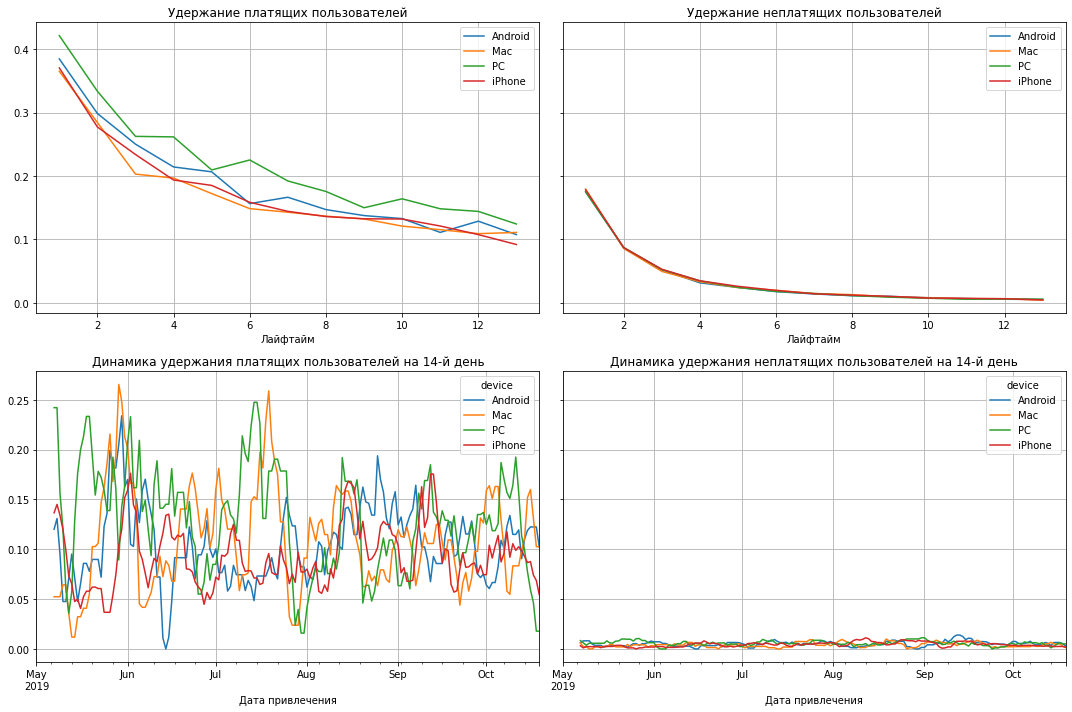

In [28]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_org,
    sessions,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device'])
plot_retention(retention_grouped, retention_history, 14, window=7)

##### Постройка графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

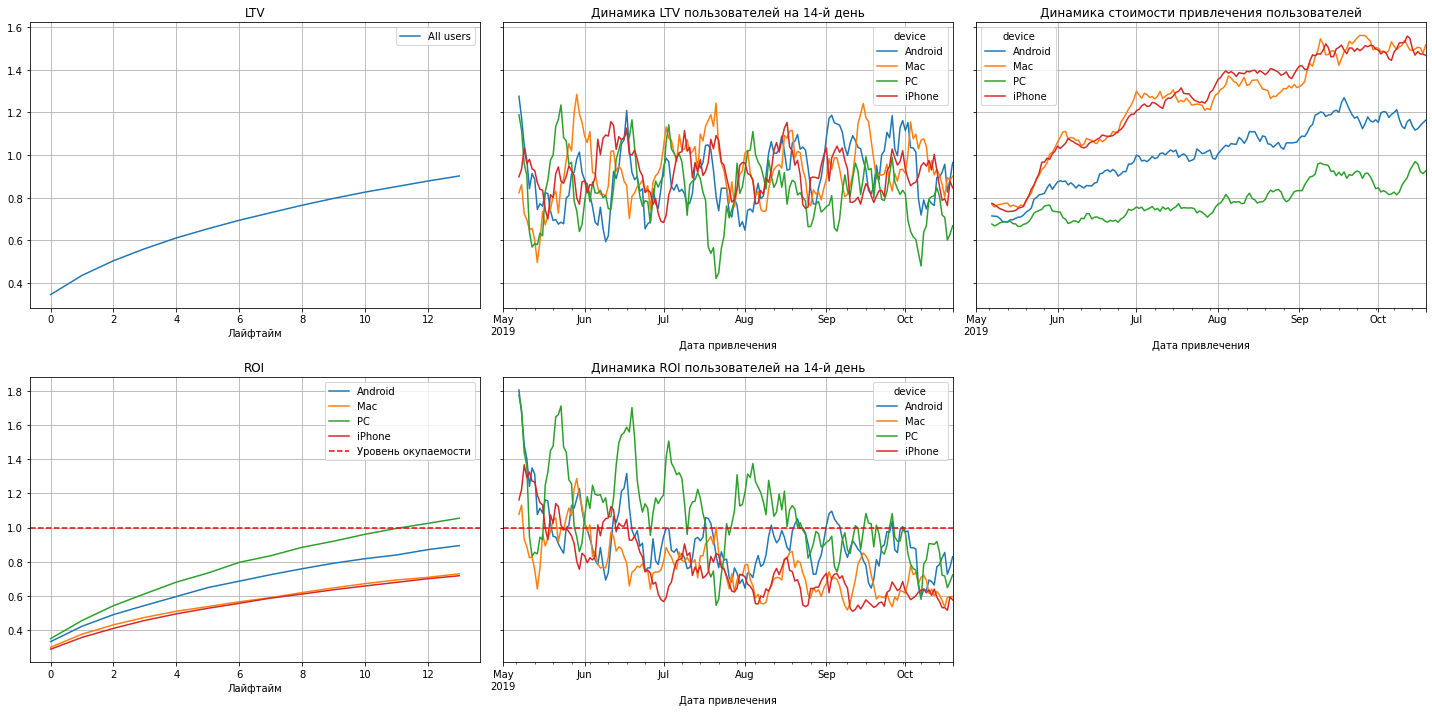

In [29]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_org, orders,  datetime(2019, 11, 1).date(),
    14, dimensions=['device'])
plot_ltv_roi(ltv_grouped, ltv_history, roi, roi_history, 14, window=7)

Выводы: Инвестиции в пользователей  не окупаются по всем платформам кроме PC, у PC низкая доля конвертации, но одна из самых высоких долей удержания, но все равно PC пользователи хоть и окупаются но достаточно слабо , у  динамика ROI у пользователей данных устройств
стабильно отрицательная, а так же у них самая большая стоимость привлечения, при этом доля платящих клиентов у этих устройств самая большая отделу маркетинга необходимо сделать акцент на пользователях PC.

#### Анализ окупаемости рекламы с разбивкой по странам. Постройка графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

##### Анализ конверсии пользователей 

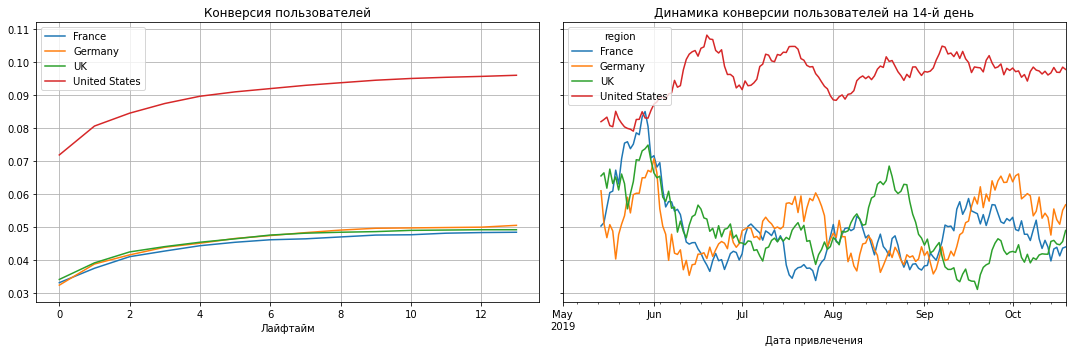

In [30]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_not_org,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'])
plot_conversion(conversion, conversion_history, 14, window=14)

##### Анализ удержания пользователей

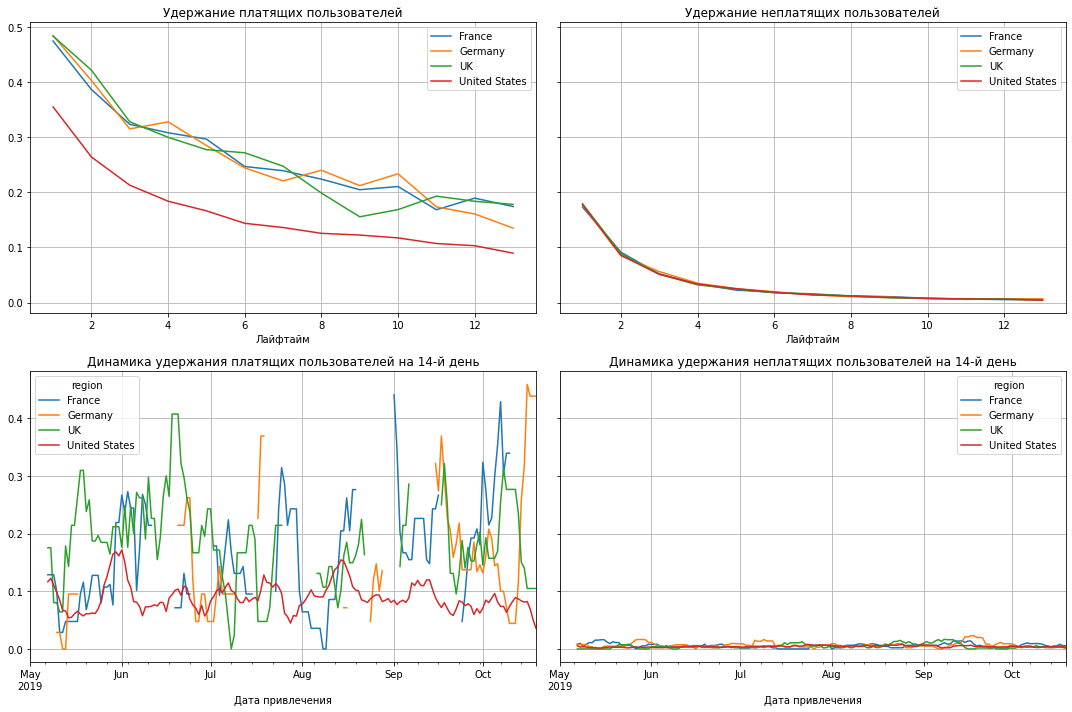

In [31]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_org,
    sessions,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'])
plot_retention(retention_grouped, retention_history, 14, window=7)

##### Постройка графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

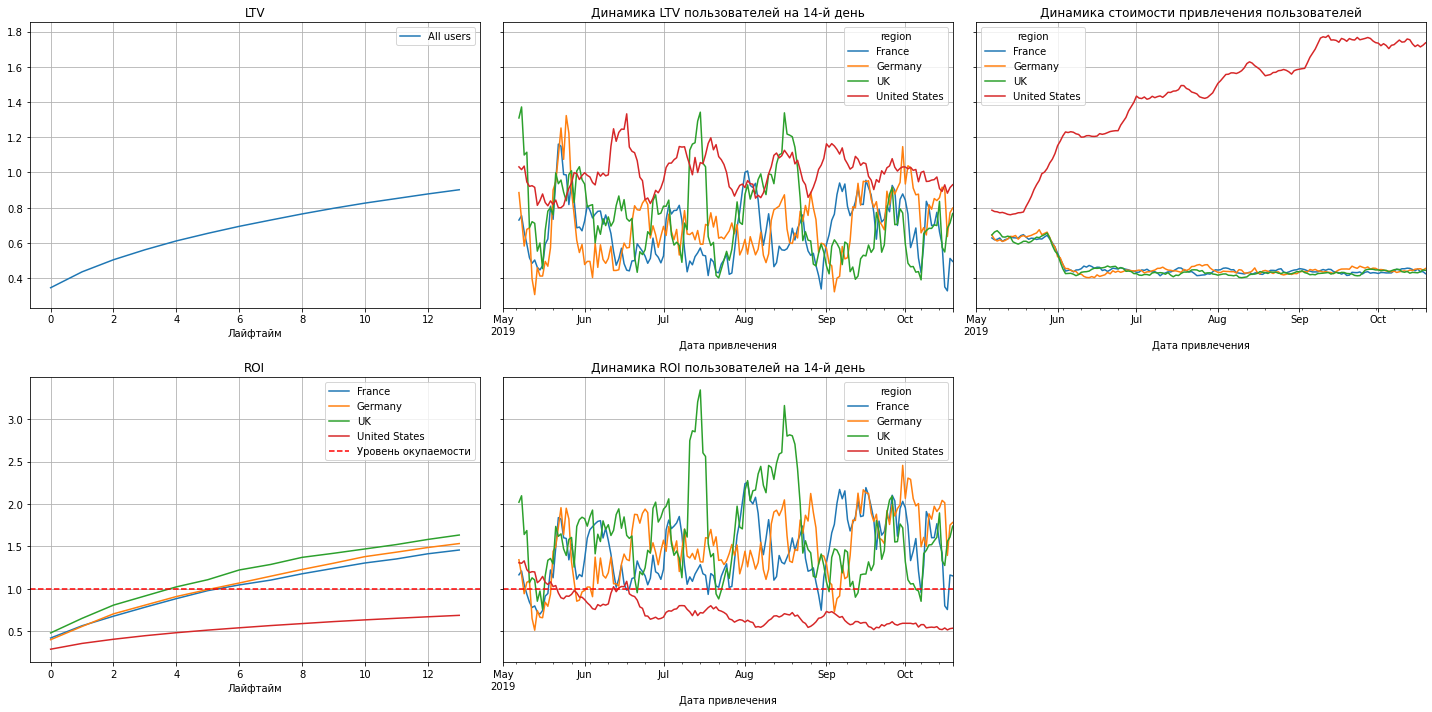

In [32]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_org, orders,  datetime(2019, 11, 1).date(),
    14, dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi, roi_history, 14, window=7)

Выводы: Пользователи из США не окупаются по инвестициям, относительно пользователей из других стран так же показывают отрицательную динамика ROI, у них кратно большая стоимость привлечения, но при этом показатель LTV довольно высокий, в сравнению с пользователями из остальных стран, при этом больше всего платящих пользователей именно из США, пользователи из США хорошо конвертируются, но плохо удерживаются,  думаю отделу маркетинга необходимо сместить акцент на пользотелей из других стран хоть среди них и меньше доля платящих клиентов и они слабо конвертируются, но при этом инвестиции в этих пользователей окупаются, поскольку у них высокий процент удержания

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам. Постройка графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

##### Анализ конверсии пользователей 

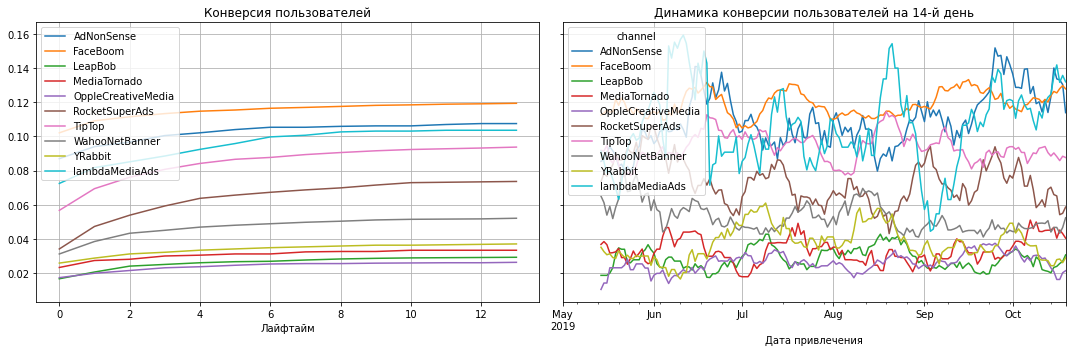

In [33]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_not_org,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'])
plot_conversion(conversion, conversion_history, 14, window=14)

##### Анализ удержания пользователей

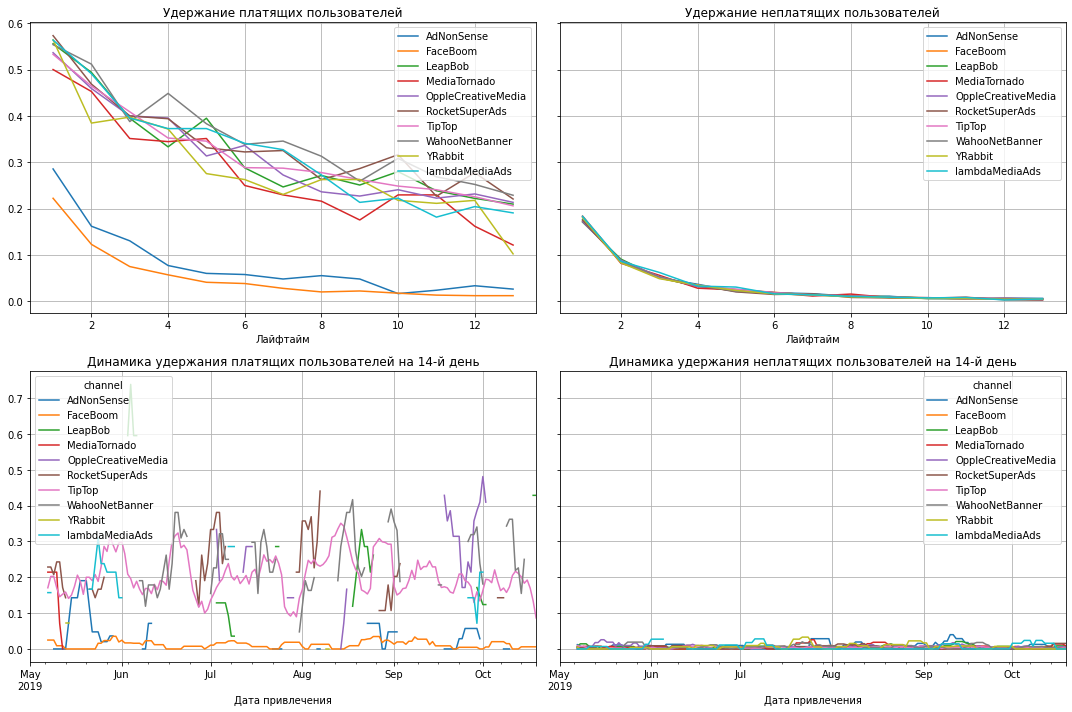

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_org,
    sessions,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'])
plot_retention(retention_grouped, retention_history, 14, window=7)

##### Постройка графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

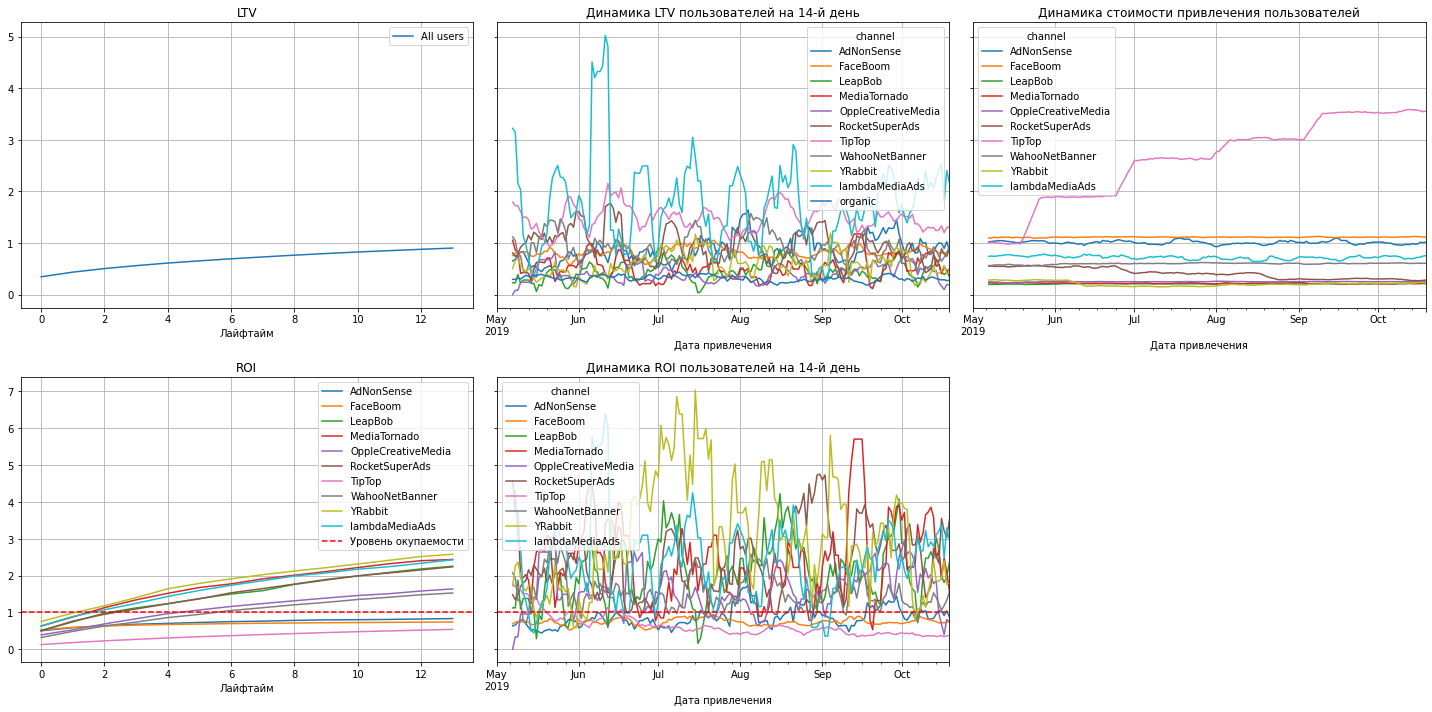

In [35]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders,  datetime(2019, 11, 1).date(),
    14, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi, roi_history, 14, window=7)

Выводы: Как видно из графиков окупаются не окупаются инвестиции у таких компаний как FaceBoom,TipTop и AdNonSense, инвестиции в эти компании не желательны, при этом у них самая большая стоимость привлечения клиента (особенно у TipTop), так же у компании AdNonSense крайне нестабильная динамика LTV, при этом доля платящих клиентов самая большая у  каналов TipTop и FaceBoom,
Несмотря на то что у источника FaceBoom самая высокая конвертация, удержание пользователей одно из самых низких (ниже примерно на 40% по отношению к другим), думаю в этом и кроется одна из причин неудачной рекламной компании.
Отделу маркетинга необходима сместить акцент на другие каналы, а инвестиции в Faceboom TipTop максимально минимизировать. Так же необходимо отводить важную роль как удерживаются привлеченные пользователи, так как несмотря на хорошую конверсию, удержание может сыграть большую роль в успехе рекламной компании. 

### Выводы

Причина неэффективности привлечения пользователей заключается в том что фокус маркетингового отдела направлен на привлечение  пользовательских групп с максимальной долей платящих пользователей и высокой доли конвертации. Но не учитывается процент удержания, а именно этот показатель в конечном счете сыграл значимую роль в провале рекламной компании последних месяцев. Поскольку самые большая доля таких  пользователей приходит от таких каналов как TipTop и FaceBoom, на пользователей из США, использующие платформы Iphone и Mac, Android на долю этих пользователей приходится самая высокая стоимость превлечения и низкий процент удержания,  именно поэтому не окупаются инвестиции не только направленные на данных пользователей, но и общие, отделу маркетинга необходимо пересмотреть свои приоритеты в стороны пользователей в первую очередь из  Германии и Великобритании, пользующихся платформой PC, привлечённые от таких рекламных каналов как YRabbit и MediaTornado, так как они обладают максимальным ROI и минимальным CAC
